# Kernel visualisation

In [1]:
import tensorflow as tf
import tensorflow.keras as K
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from vis.visualization import visualize_cam, visualize_saliency, visualize_activation
import cv2

import sys
sys.path
sys.path.append("../../models/classification")

from models import ResNet, AlexNet
from dataset import Dataset

Using TensorFlow backend.


In [3]:
TRAIN_PATH = "../../../honours_project_data/main/train.txt"
VAL_PATH = "../../../honours_project_data/main/test.txt"
WEIGHTS_PATH = "../../../out/new_out/ResNet/ResNet_fusion_weights.h5"

train_data = Dataset(TRAIN_PATH, res=(120, 160))
val_data = Dataset(VAL_PATH, res=(120, 160))

model = ResNet("fusion", train_data.num_classes(), train_data.shape()).get_model()

model.load_weights(WEIGHTS_PATH)
layer_dict = dict([(layer.name, layer) for layer in model.layers])

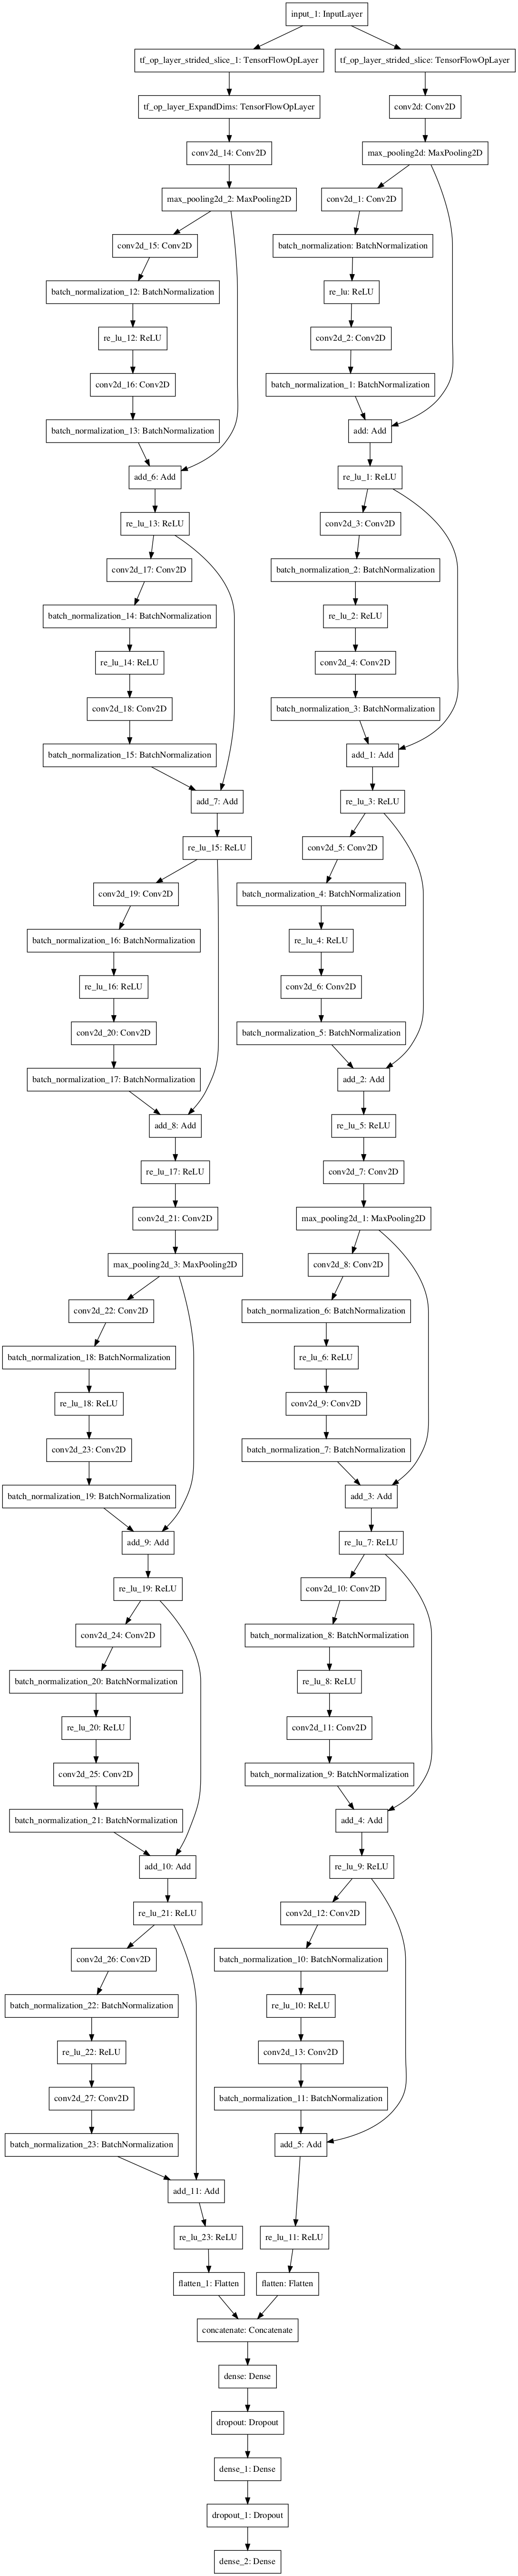

In [9]:
# layers = list(enumerate([layer.name for layer in model.layers]))
# layers_dict = {layer[1]: layer[0] for layer in layers}
# layers_dict

K.utils.plot_model(model)

In [7]:
def plot_kernels(w, padding=1, color=False):
    print(w.shape)
    w = (w - np.min(w)) / (np.max(w)-np.min(w))
    
    ksize = w.shape[:2]
    channels = 3 if w.shape[2] == 3 and color else 1
    filters = w.shape[3]
    
    length = int(np.sqrt(filters))
    
    rows = []
    for i in range(length):
        row = []
        for j in range(length):
            row.append(w[..., :channels, length*i+j])
            row.append(np.ones((ksize[1], padding, channels)))
        row = np.hstack(row)
        rows.append(row)
        rows.append(np.ones((padding, row.shape[1], channels)))
    final = np.vstack(rows)
    final = final[:-padding, :-padding]
    
    if channels == 1:
        final = final[..., 0]
    
    fig, ax = plt.subplots(figsize=(15, 15))
    ax.imshow(final, cmap="gray")
    ax.axis('off')

(5, 5, 32, 32)


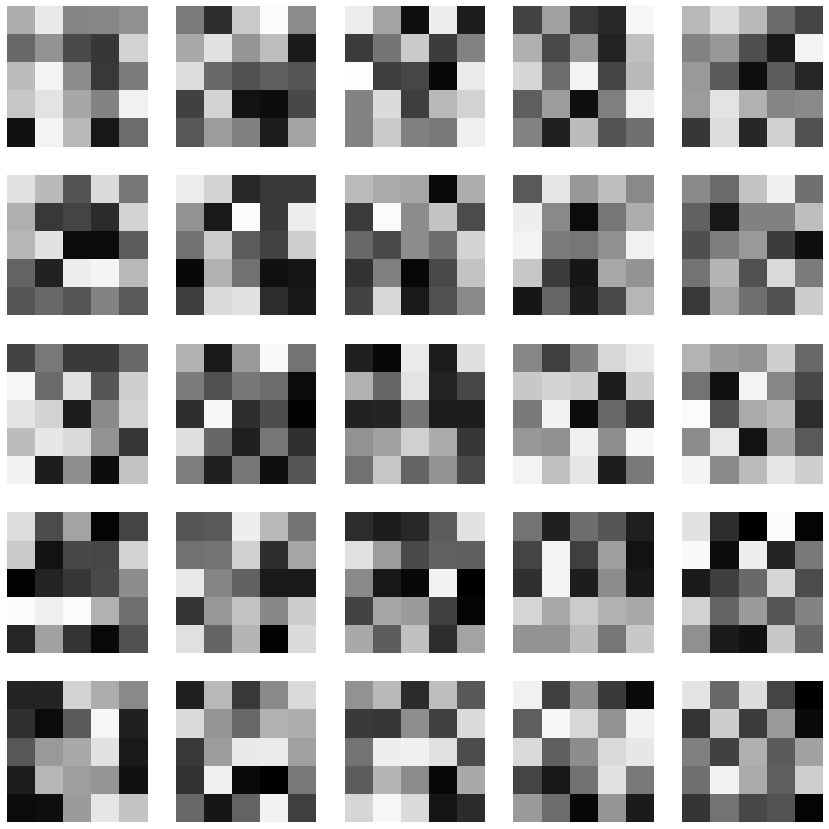

In [17]:
weights = model.get_layer("conv2d_1").weights[0].numpy()
plot_kernels(weights, padding=1, color=False)